# **Project Title:** Lead Categorization for FicZon Inc

###  **Business Case Overview:**

FicZon Inc is an IT solution provider with products ranging from on-
premises products to SAAS based solutions. FicZon major leads

generation channel is digital and through their website.
FicZon business is majorly dependent on the sales force
effectiveness. As the market is maturing and more new competitors
entering the market, FicZon is experiencing the dip in sales.
Effective sales is dependent on lead quality and as of now, this is
based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the
lead categorization, it’s value is in for post analysis, rather than
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.


**Objective:**
FicZon aims to implement a Machine Learning (ML) model that can predict the lead quality (High Potential or Low Potential) at the time of lead generation to improve conversion rates and overall sales effectiveness.

 ## **Project Goals:**
1. **Perform data exploration and analysis** to understand patterns in sales effectiveness.

2. **Build a classification model** to predict lead quality:

 * Categories: High Potential, Low Potential.

## **Data Collection**



#### **Data Source:**
The data was collected from the company's internal SQL database using SQL Workbench. The relevant table was queried and exported to a .csv file for local processing and machine learning workflows.

**Steps Followed:**
1. Accessed SQL Workbench using the following connection parameters:

 * Database Name: project_sales
 * Table Name: data

 * Host: 18.136.157.135

 * Port: 3306

 * Username: dm_team2

 * Password: DM!$Team&27@9!20!

2. Executed SQL Query to extract relevant data


```
SELECT * FROM project_sales.data;

```
3. Exported the Result as a .CSV file from SQL Workbench.

4. Imported the CSV into Python using pandas.





In [1]:
#Let's Import Necesery Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('sales_effectiveness.csv')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### **Dataset Summary:**

 * Total Records: 7422

 * Features: 9 Columns



 **Collected Fields:** Created, Product_ID, Source, Mobile, Email, Sales_Agent, Location, Delivery_Mode, Status

## **Basic Checks:**

In [3]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [4]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [6]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [7]:
data.describe(include=['O'])

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [8]:
data.shape

(7422, 9)

##### Checking Unique value for each Columns

In [9]:
data['Source'].value_counts()


Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [10]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [11]:
data['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [12]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [13]:
data['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

### **Initial Observations:**

* Total records: 7422

* Columns: Created, Product_ID, Source, Mobile, EMAIL, Sales_Agent, Location, Delivery_Mode, Status

* Missing values:

 * Product_ID, Location → have some missing (NaN)

 * EMAIL → contains invalid entries like #VALUE!

 * Mobile → some data masked or invalid (e.g., XXXXXXX)

 * Created → datetime column

* Data Types:

 * Created should be converted to datetime for time-based analysis

 * Most other fields are categorical or string


## **Domain Analysis:**


### **Business Context:**

FicZon Inc’s sales success is highly dependent on the quality of leads. Currently, this lead classification (e.g., Potential, Open, Not Responding) is done manually. Delayed insights impact conversion rates.

#### **Objective:**

Use machine learning to pre-categorize leads as:

* High Potential

* Low Potential

This will:

* Improve sales agent productivity

* Enable early prioritization of quality leads

* Automate the lead scoring pipeline

### **Relevant Domain Insights:**
* Channels (Source like Website, Call, Live Chat) indicate engagement intent

* Sales Agent and Location may reflect geographic or agent-specific performance trends

* Status is our target variable

 * Will be reclassified into High vs. Low Potential

 * Mapping example:

   1. High Potential: 	CONVERTED, converted, Potential, In Progress Positive, Long Term

   2. Low Potential: Junk Lead, Not Responding, Just Enquiry, In Progress Negative, LOST, Open


### **Columns wise Domain Insight**:

| Feature         | Type                          | Description                                                                   |
| --------------- | ----------------------------- | ----------------------------------------------------------------------------- |
| Created         | object (to be datetime)       | Timestamp indicating when the lead was created.                               |
| Product_ID      | float64                       | Identifier for the product the lead is interested in. Some missing entries.    |
| Source          | object                        | Channel through which the lead was generated. E.g., Website, Call, Live Chat. |
| Mobile          | object                        | Lead's mobile number. Contains missing or masked values.                       |
| EMAIL           | object                        | Lead's email address. Contains invalid entries like #VALUE! and nulls.        |
| Sales_Agent     | object                        | The sales agent assigned to follow up on the lead.                             |
| Location        | object                        | Geographical location of the lead. Some missing values observed.               |
| Delivery_Mode   | object                        | Preferred delivery mode for the product (e.g., Mode-1, Mode-5).                |
| Status          | object                        | Target variable. Lead quality category (e.g., Potential, Open).                |

## **Problem Definition:**

##### **Type of Problem:**
* **Machine Learning Task:** Supervised Learning

* **Problem Type:** Classification

This is a multi-class classification problem, which we will simplify into a binary classification problem for better business impact and model effectiveness.

##### **Objective:**
To build a machine learning model that can:

* Automatically predict the lead quality based on historical lead information.

* Help sales teams prioritize high potential leads to improve efficiency and conversion rate.

##### **Business Impact:**

* **Increased Sales Effectiveness:** By automating lead categorization, the sales force can focus on leads with higher probability of conversion.

* **Reduced Manual Effort:** Eliminates dependence on manual classification and subjective judgment.

* **Scalable Process:** Enables consistent and scalable lead prioritization as the business grows.


## **Exploratory Data Analysis (EDA)**

##### Drop Unnecessary Columns



In [14]:
# Drop Mobile and Email as Unnecessary Columns
data.drop(['Mobile', 'EMAIL'], axis=1, inplace=True)

##### Droping Null Value Rows

In [15]:
# Dropping rows with missing data because they are few
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 7)

##### Pre-EDA Transformation: Extract Date Features

Let's start by extracting key features from the Created column:

In [16]:
# Convert 'Created' to datetime format
data['Created'] = pd.to_datetime(data['Created'], errors='coerce')

# Extract new time-based features
data['Created_Date'] = data['Created'].dt.date
data['Created_Year'] = data['Created'].dt.year
data['Created_Month'] = data['Created'].dt.month
data['Created_Month_Name'] = data['Created'].dt.month_name()
data['Created_Day'] = data['Created'].dt.day
data['Created_Hour'] = data['Created'].dt.hour


C:\Users\satya\AppData\Local\Temp\ipykernel_21488\2219860071.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Created'] = pd.to_datetime(data['Created'], errors='coerce')


##### Define the mapping for reclassifying the 'Status' column

In [17]:

status_mapping = {
    'CONVERTED': 'High Potential',
    'converted': 'High Potential',
    'Potential': 'High Potential',
    'In Progress Positive': 'High Potential',
    'Long Term': 'High Potential',
    'Junk Lead': 'Low Potential',
    'Not Responding': 'Low Potential',
    'Just Enquiry': 'Low Potential',
    'In Progress Negative': 'Low Potential',
    'LOST': 'Low Potential',
    'Open': 'Low Potential'
}

# Create the 'Lead_Potential' column by applying the mapping to the 'Status' column
data['Lead_Potential'] = data['Status'].map(status_mapping)

##### Let's Mapping Source Columns for better understanding

In [18]:
data['Source'].unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [19]:
# Compressing and Merging the all Source by there Category in column
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

C:\Users\satya\AppData\Local\Temp\ipykernel_21488\1506323045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',


In [20]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_Date,Created_Year,Created_Month,Created_Month_Name,Created_Day,Created_Hour,Lead_Potential
0,2018-11-13 18:51:00,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Potential,2018-11-13,2018,11,November,13,18,High Potential
1,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,2018-11-13,2018,11,November,13,18,High Potential
2,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,2018-11-13,2018,11,November,13,17,High Potential
3,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,2018-11-13,2018,11,November,13,16,Low Potential
4,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,2018-11-13,2018,11,November,13,16,High Potential


##### Univariate Analysis
Understand distribution of each individual column.

C:\Users\satya\AppData\Local\Temp\ipykernel_21488\538295947.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')  # Create a histogram with a kernel density estimate
C:\Users\satya\AppData\Local\Temp\ipykernel_21488\538295947.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')  # Create a histogram with a kernel density estimate
C:\Users\satya\AppData\Local\Temp\ipykernel_21488\538295947.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, pale

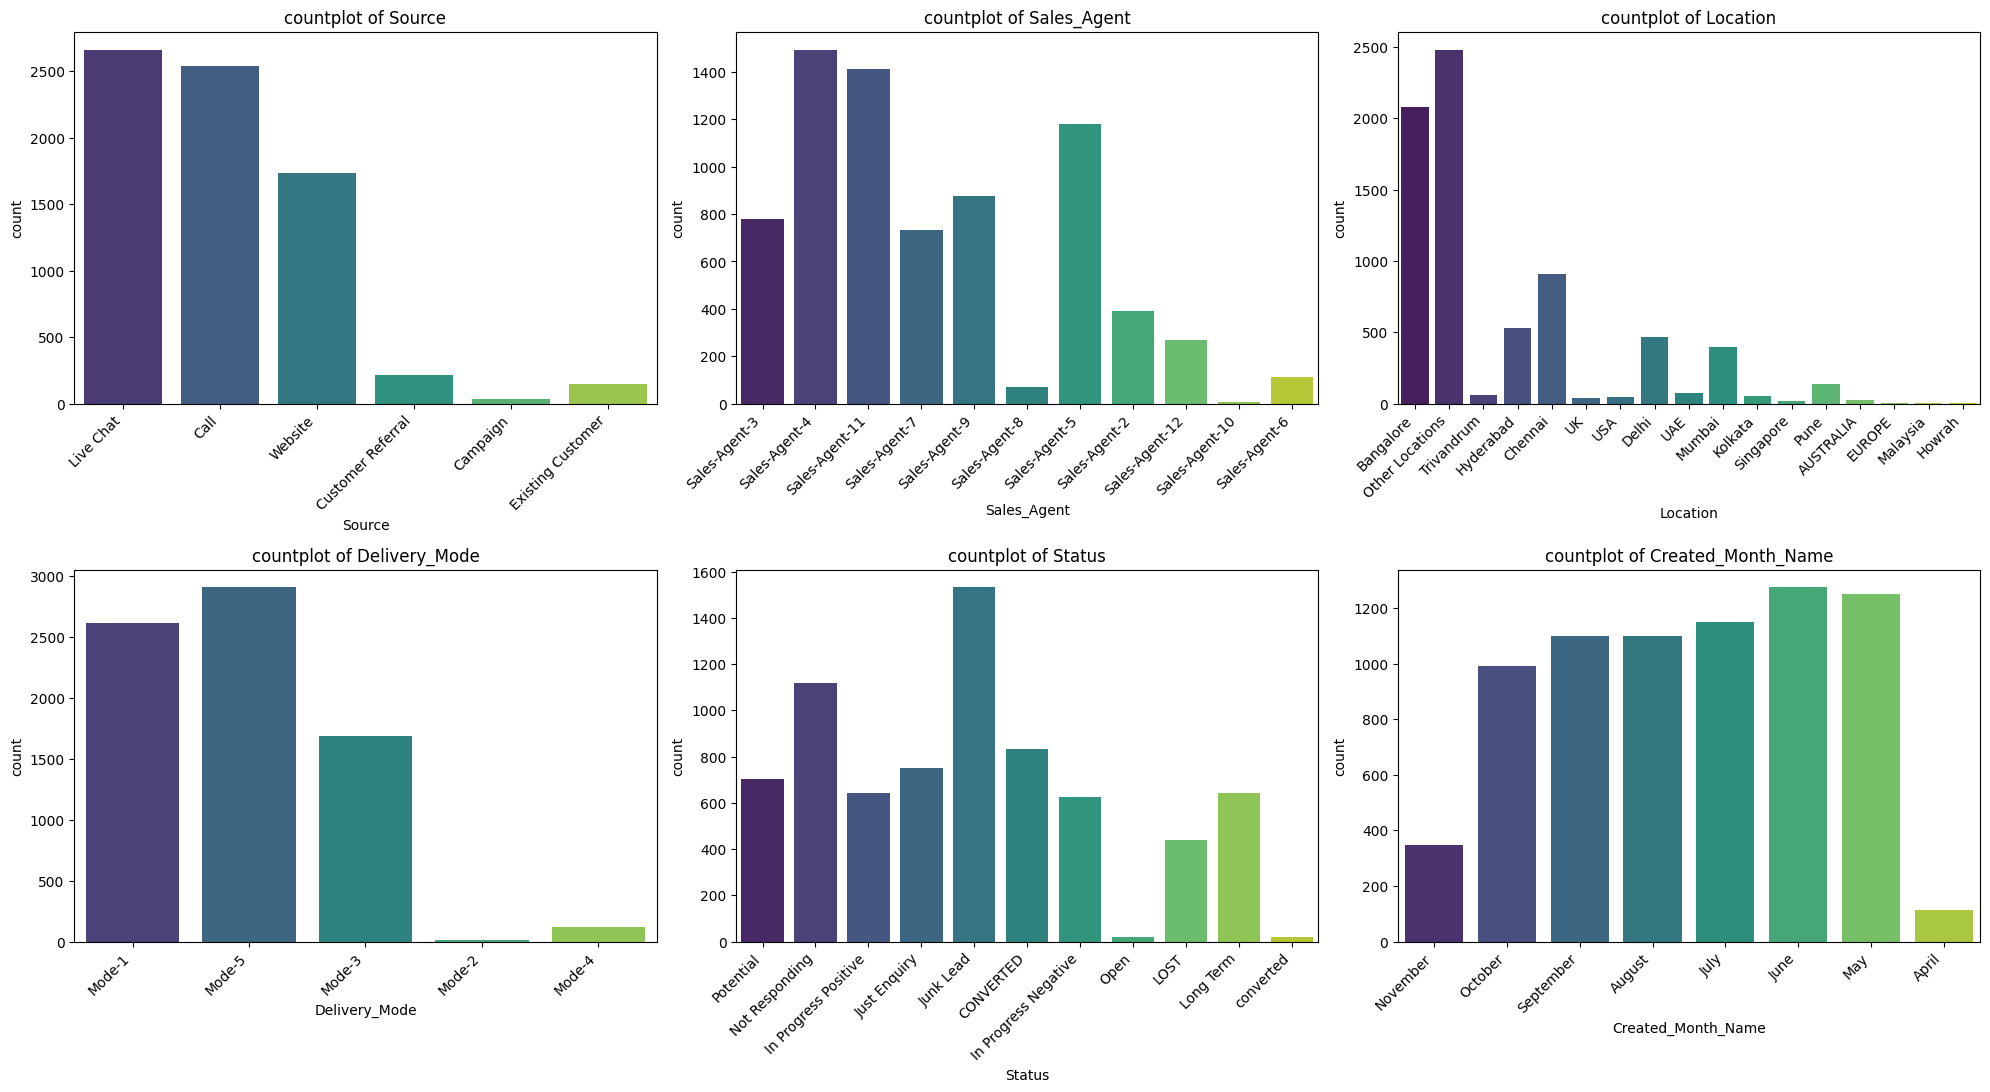

In [21]:
# Countplot for categorical variables
# Plotting the labels in each column
plt.figure(figsize=(20, 15))

# Iterate through columns of the DataFrame and create subplots
# Use enumerate to get both the index (starting from 0) and the column name
# Removed 'Status' as it was dropped earlier
for i, col in enumerate(['Source', 'Sales_Agent', 'Location', 'Delivery_Mode','Status','Created_Month_Name']):
    # Adjust the index for the subplot grid (1-based indexing)
    # The grid is 3x2, so the subplot index should be i + 1
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=data, x=col, palette='viridis')  # Create a histogram with a kernel density estimate
    plt.title(f'countplot of {col}')  # Set the title of the subplot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add this line to prevent overlapping titles and labels
plt.tight_layout()
# Display the plot
plt.show()

In [22]:
data.isnull().sum()

Created               0
Product_ID            0
Source                0
Sales_Agent           0
Location              0
Delivery_Mode         0
Status                0
Created_Date          0
Created_Year          0
Created_Month         0
Created_Month_Name    0
Created_Day           0
Created_Hour          0
Lead_Potential        0
dtype: int64

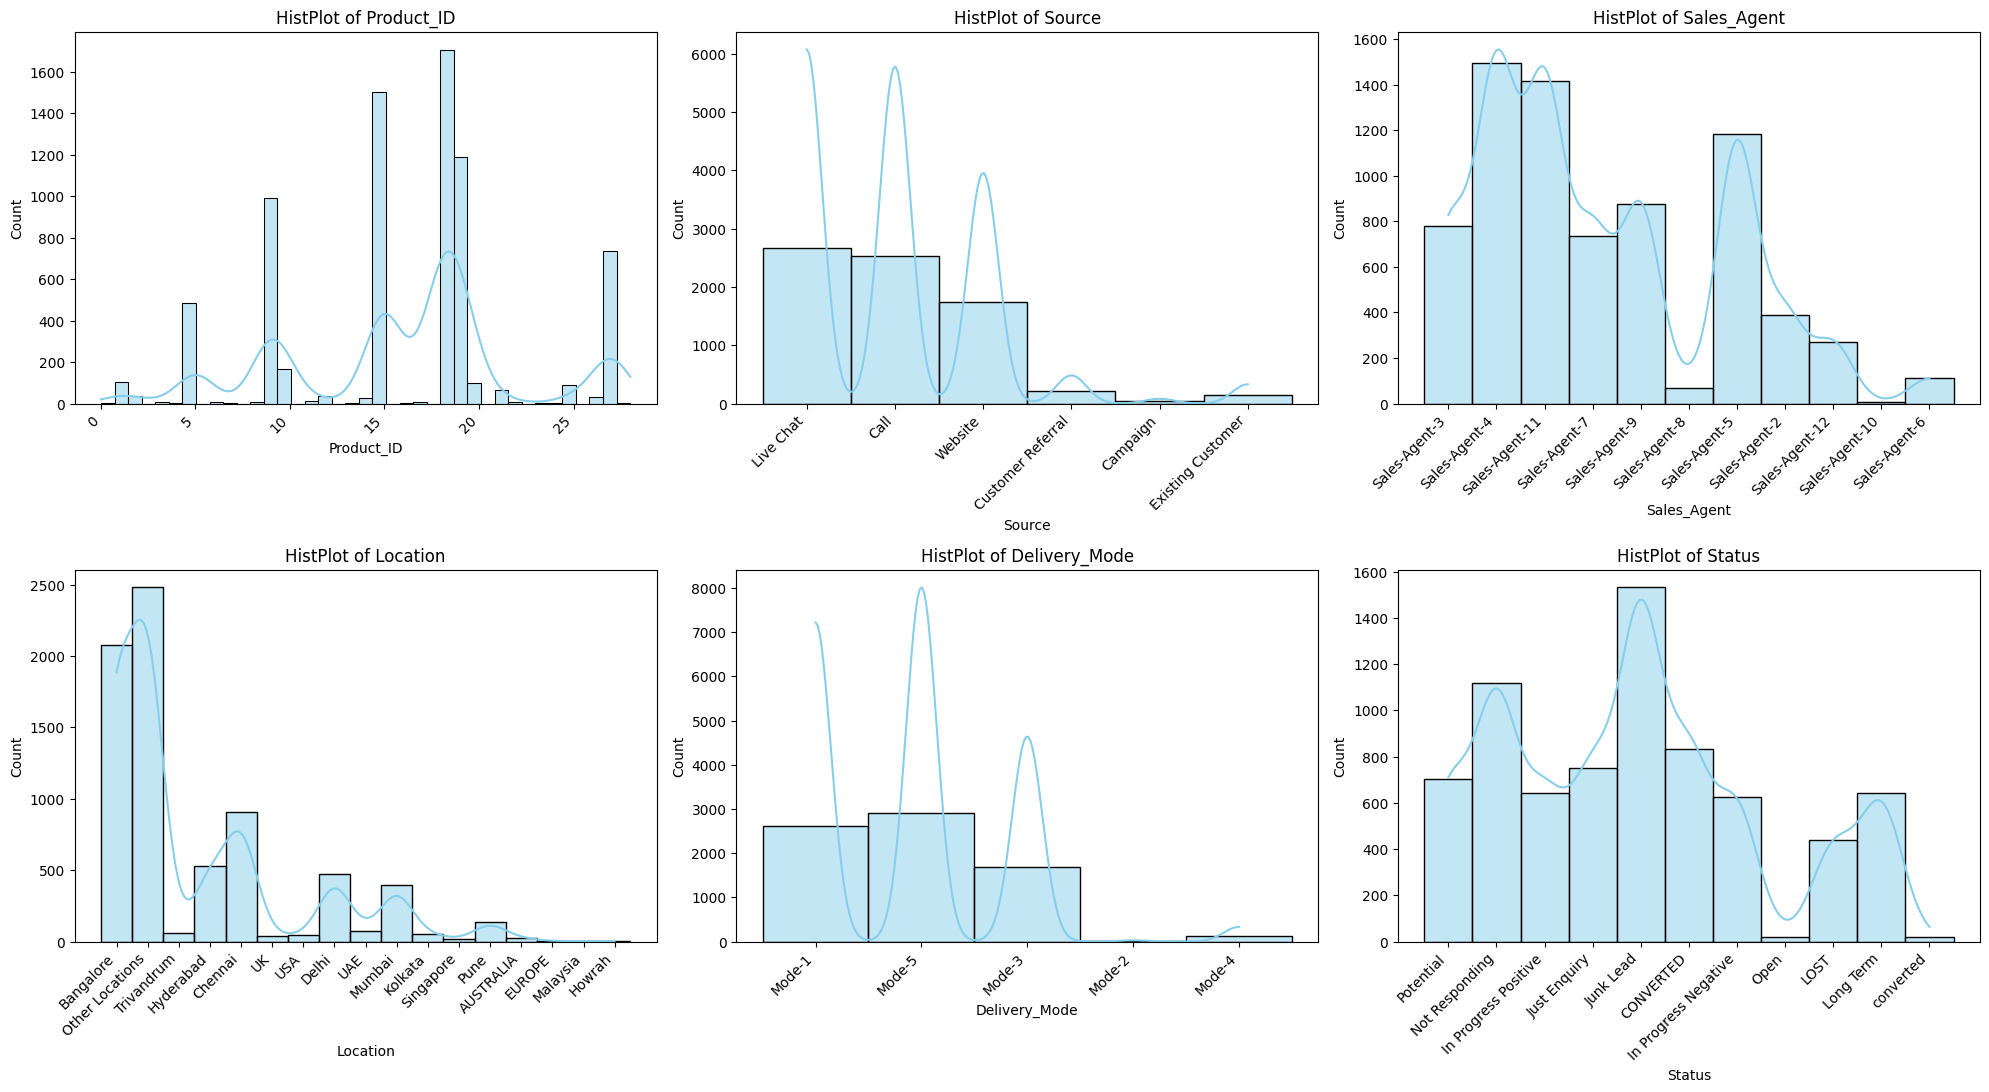

In [23]:
# Create a figure with a specific size
plt.figure(figsize=(20, 15))

# Iterate through columns of the DataFrame and create subplots
# Use enumerate to get both the index (starting from 0) and the column name
for i, col in enumerate(['Product_ID','Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']):
    # Adjust the index for the subplot grid (1-based indexing)
    # The grid is 3x2, so the subplot index should be i + 1
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=data, x=col, color='skyblue', kde=True)  # Create a histogram with a kernel density estimate
    plt.title(f'HistPlot of {col}')  # Set the title of the subplot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add this line to prevent overlapping titles and labels
plt.tight_layout()
# Display the plot
plt.show()

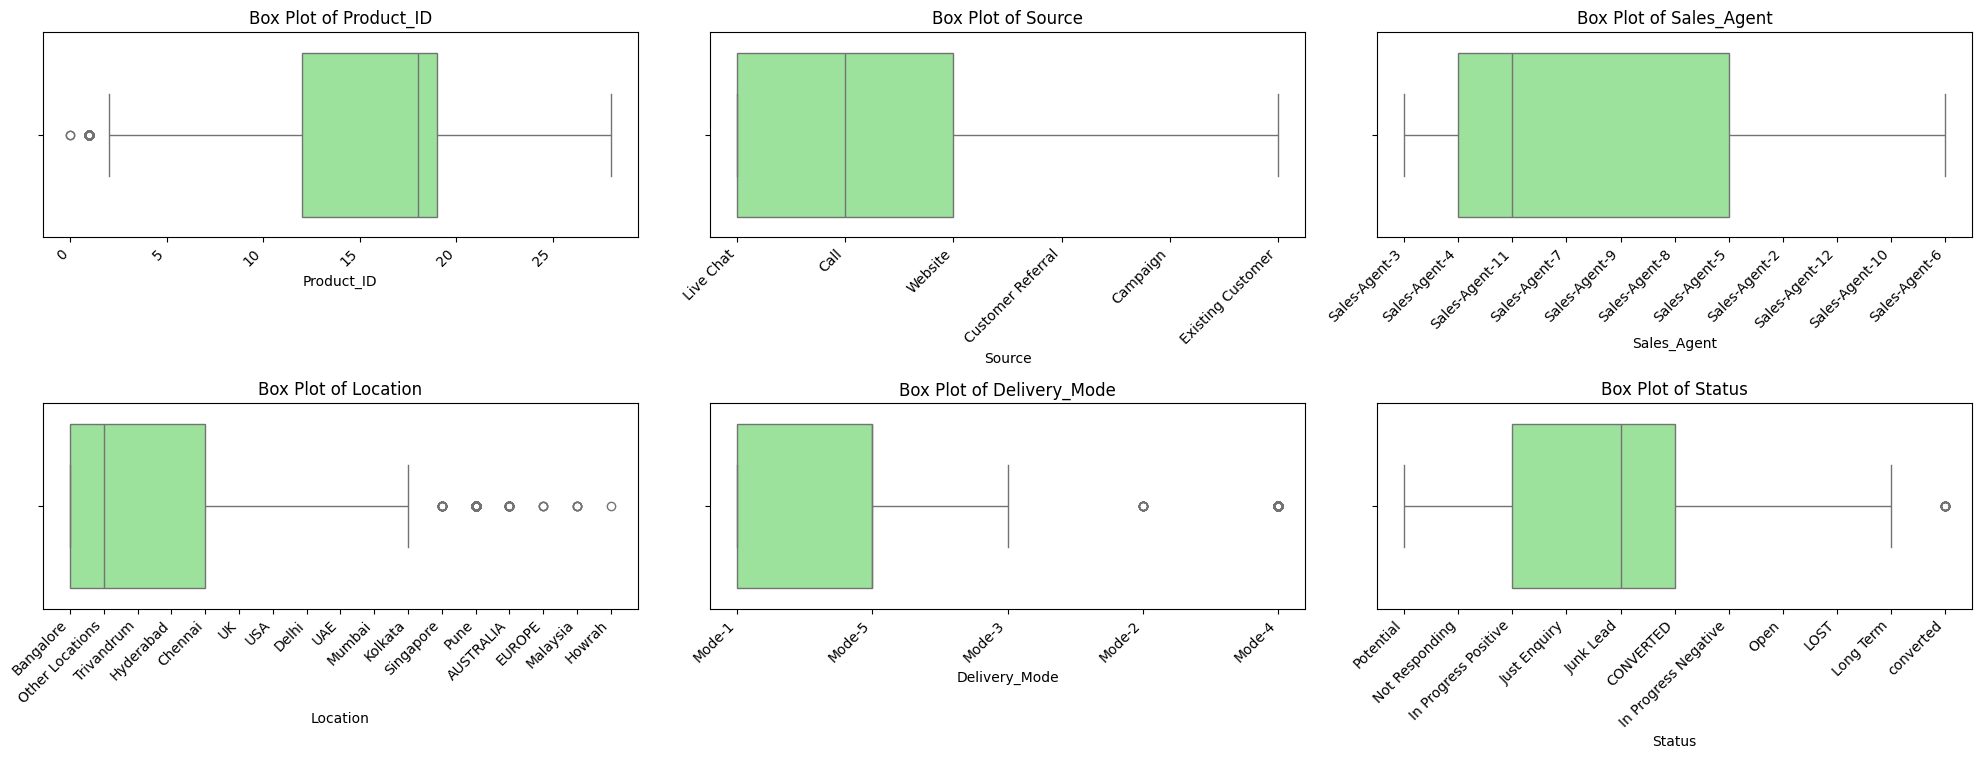

In [24]:
# Checking Outlier using Boxplot

plt.figure(figsize=(20, 10))  # Create a figure with a specific size
for i, col in enumerate(['Product_ID','Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']):
    # Adjusted the subplot index to be 1-based by adding 1 to i
    plt.subplot(3, 3, i + 1)  # Create a subplot in a 3x3 grid
    sns.boxplot(data=data, x=col, color='lightgreen')  # Create a box plot for the column
    plt.title(f'Box Plot of {col}')  # Set the title of the subplot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the plot

##### **Box Plot Analysis Summary:**
1. **Product_ID:**

* Distribution shows concentration between values 10 to 20.

* A few outliers exist near the lower end (Product_ID ≈ 0–5), indicating rare product interest.

2. **Source:**

* Highly skewed with many rare categories.

* Majority of leads come from dominant few sources (e.g., Website, Live Chat).

* Several minor sources appear as outliers.

3. **Sales_Agent:**

* Sales agents are fairly distributed with slight skewness.

* A few agents appear to have significantly fewer or more leads than others.

4. **Location:**

* Skewed distribution towards top cities like Bangalore and Hyderabad.

* Outliers represent less frequent or international locations (e.g., Europe, USA, Malaysia).

5. **Delivery_Mode:**

* Mode-5 is the most common delivery type.

* Other modes (Mode-2, Mode-4) appear as categorical outliers.

6. **Status (Lead Category):**

* Lead statuses like "Junk Lead", "Not Responding", and "CONVERTED" are frequent.

* The presence of multiple unique values indicates a need for grouping before modeling.

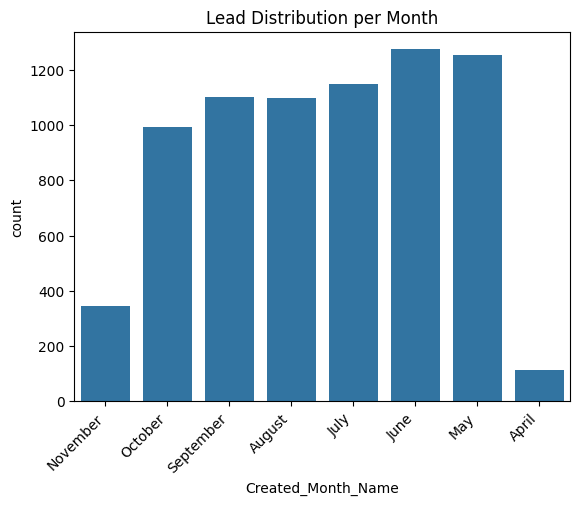

In [25]:
# Shows number of leads generated each Month.
sns.countplot(x='Created_Month_Name', data=data)
plt.title("Lead Distribution per Month")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#####  Bivariate Analysis
Understand relationships between independent features and the target variable (Lead_Potential)


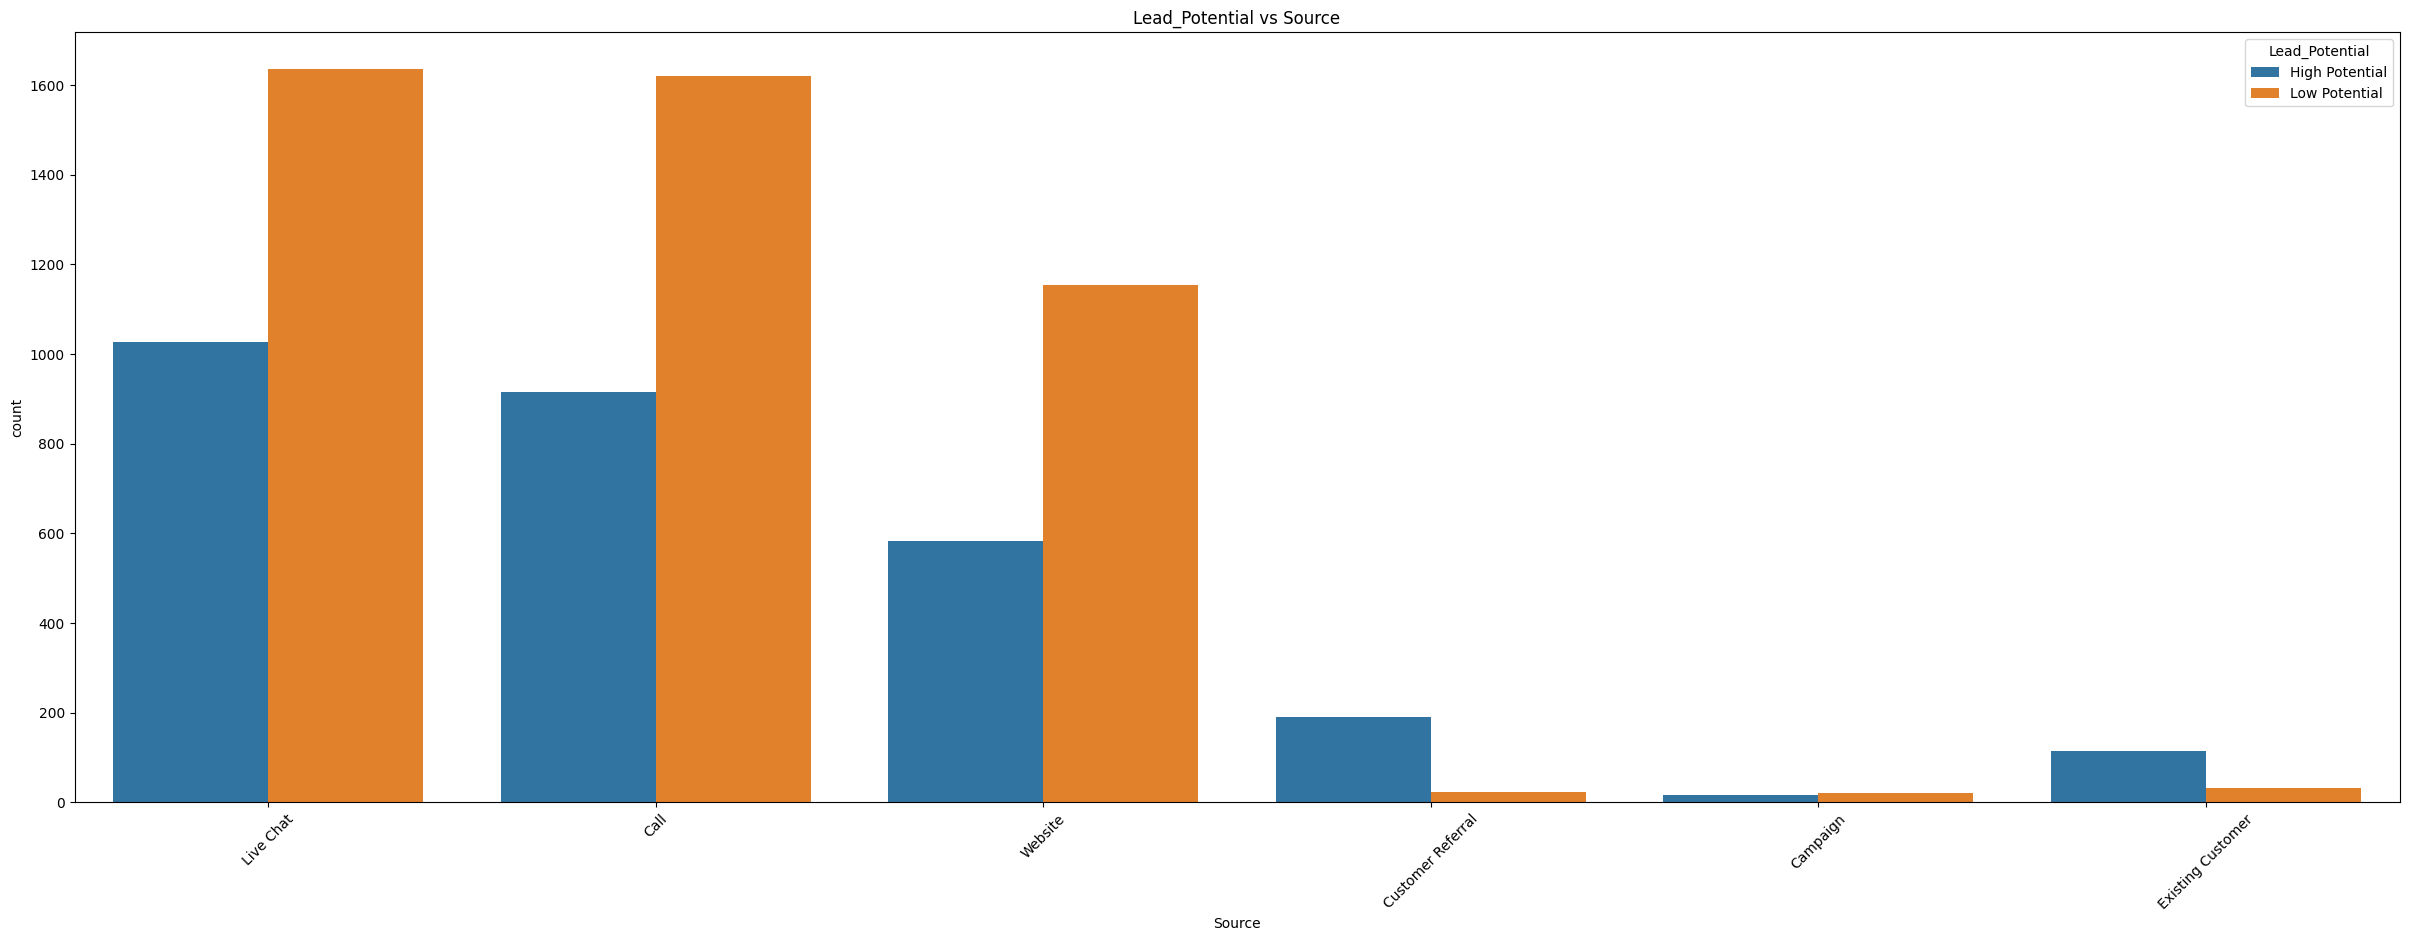

In [26]:
# Source vs Lead_Potential
plt.figure(figsize=(30, 10))  # Create a figure with a specific size
sns.countplot(data=data, x='Source', hue='Lead_Potential')
plt.title("Lead_Potential vs Source")
plt.xticks(rotation=45)
plt.show()

This grouped bar plot visualizes how different lead sources contribute to Low Potential and High Potential lead categories.

1. **Top Performing Sources (with significant High Potential leads):**

* Call: Highest contributor overall; strong performance in both potential categories.

* Website and Live Chat-Direct: Major traffic sources with substantial High Potential leads.

* Customer Referral and Live Chat-Blog: Small in volume but relatively balanced between high and low potentials — indicating higher lead quality.

2. **Low Performing Sources:**

* Sources like Live Chat-Quora, US Website, Just Dial, and Campaign mostly yield Low Potential leads.

* E-mail Message, Remarketing, and Live Chat-Google Ads have negligible contribution to High Potential leads.

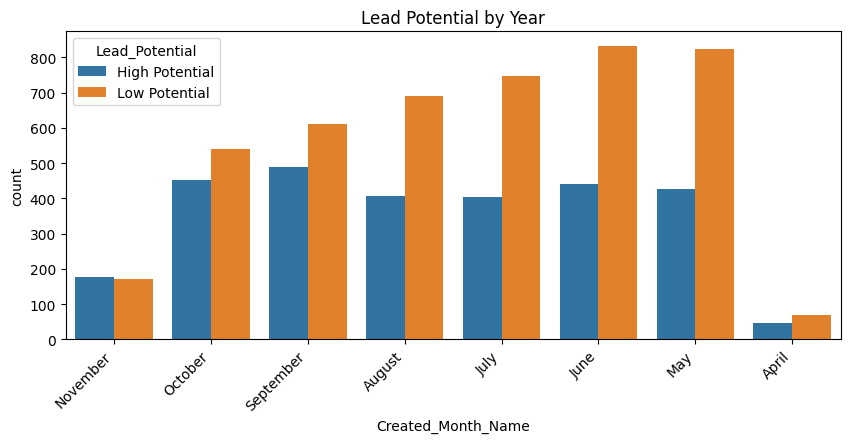

In [27]:
# he proportion of High vs Low Potential leads changes by Month
# Useful to evaluate if lead quality improved over time.
plt.figure(figsize=(10,4))
sns.countplot(x='Created_Month_Name', hue='Lead_Potential', data=data)
plt.title("Lead Potential by Year")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* May, June, July, and August show the highest number of leads generated.

* In all months, Low Potential leads outnumber High Potential leads.

* High Potential leads are relatively consistent from May to October.

* April and November show a sharp drop in overall leads, possibly indicating data collection gaps or seasonal trends.

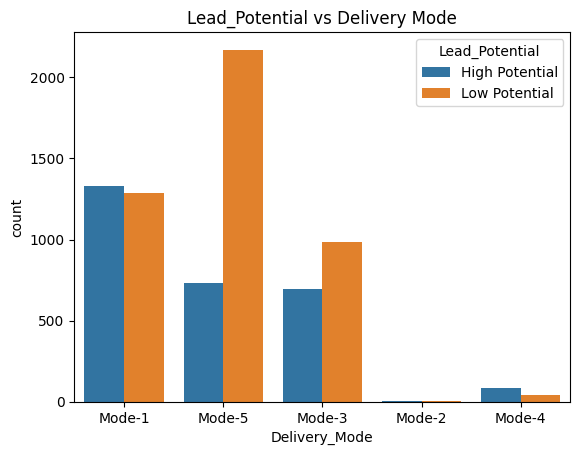

In [28]:
# Delivery_Mode vs Lead_Potential
sns.countplot(data=data, x='Delivery_Mode', hue='Lead_Potential')
plt.title("Lead_Potential vs Delivery Mode")
plt.show()

* Mode-5 is the most common delivery mode, but it also has the highest number of Low Potential leads.

* Mode-1 stands out with a higher count of High Potential leads compared to Low Potential, making it the most effective mode in attracting quality leads.

* Mode-3 also has a decent volume of High Potential leads, but Low Potential is still dominant.

* Modes 2 and 4 have very low lead counts, suggesting minimal usage or effectiveness.

#####  Multivariate Analysis
See how combinations of features affect target variable.

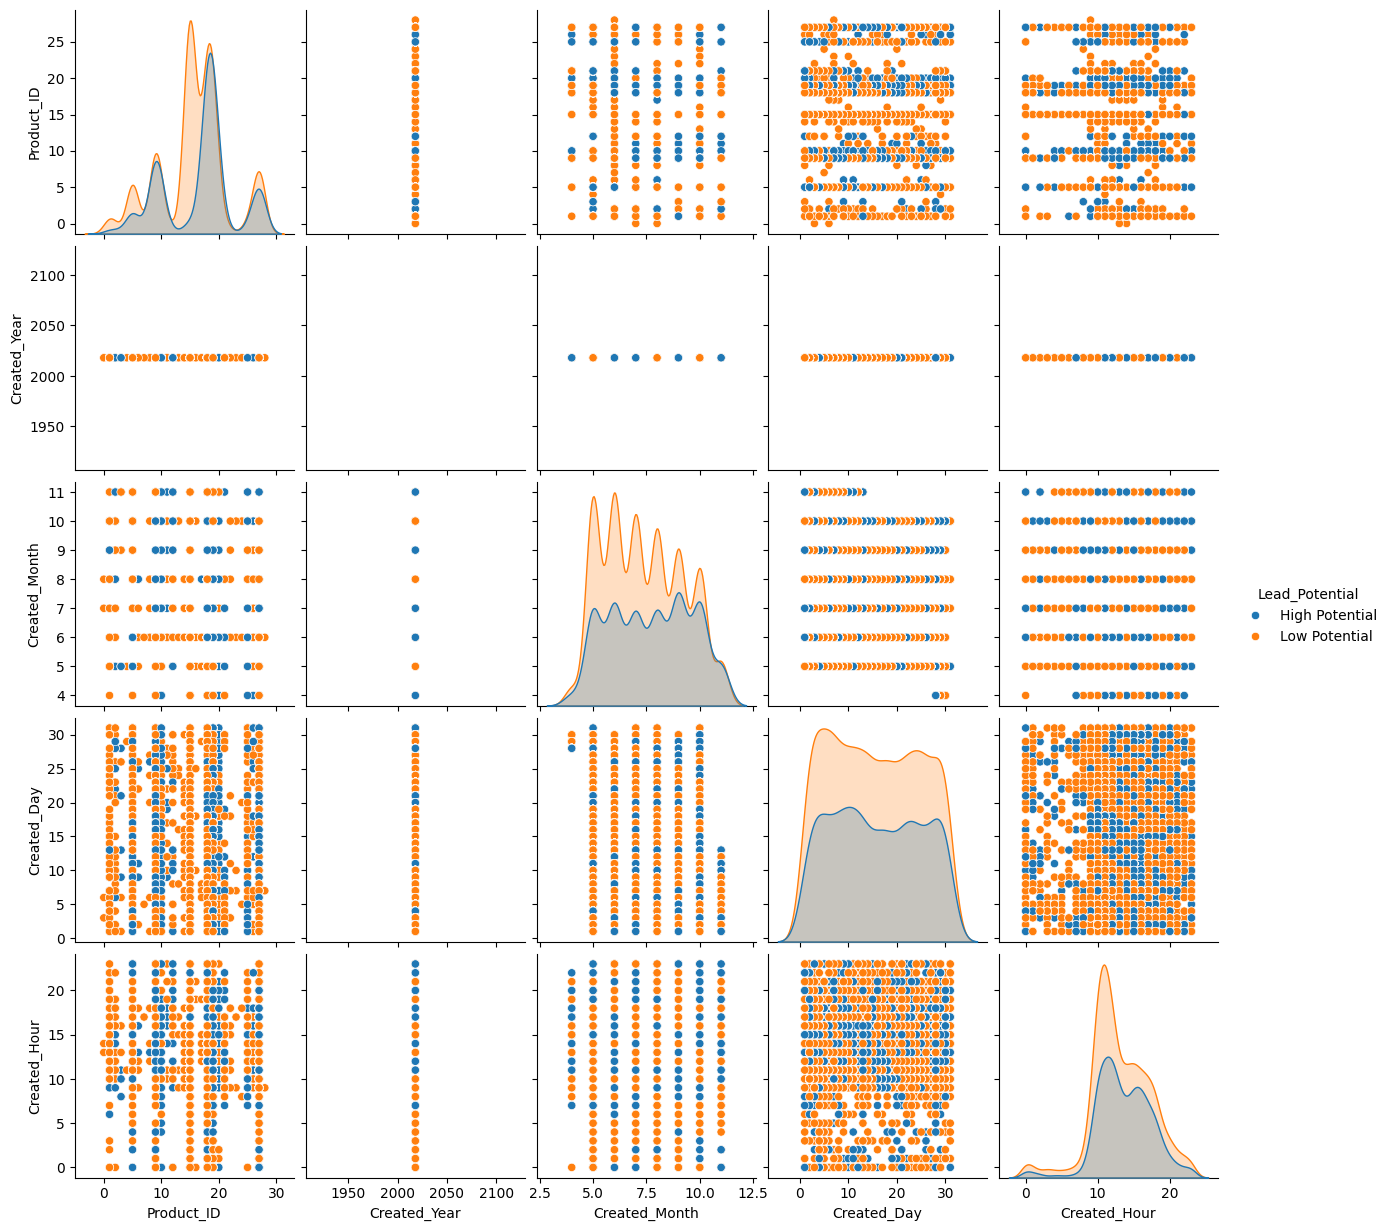

In [29]:
sns.pairplot(data, hue='Lead_Potential', diag_kind='kde')

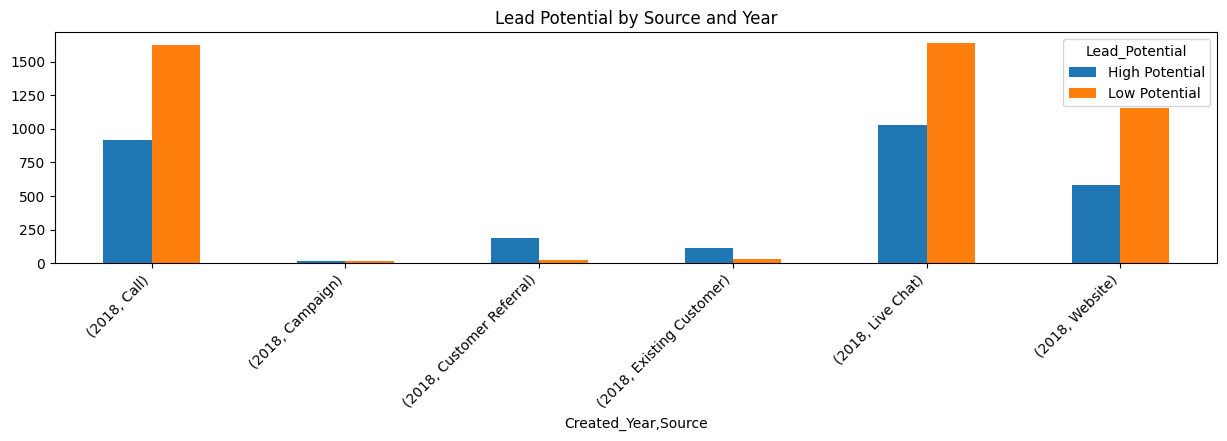

In [30]:
# Understand which sources performed better in certain years
# Spot shifting trends in effective channels or customer behavior over time
pd.crosstab([data['Created_Year'], data['Source']], data['Lead_Potential']).plot(kind='bar', figsize=(15,3))
plt.title("Lead Potential by Source and Year")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* Call and Website were the most dominant sources by volume.

 * Both generated a high number of Low Potential leads, though calls had a significant number of High Potential ones too.

* Customer Referral and Google Ads stood out with relatively balanced or higher High Potential leads.

* Live Chat channels (PPC, Google Ads, Organic) had mixed results — Google Ads had more Low Potential leads, whereas Live Chat-PPC had better balance.

* Some sources such as By Recommendation, E-mail Message, SMS Campaign, Personal Contact had very low volume but still contributed to some High Potential leads, indicating possible niche value.

* YouTube, Quora, Blog and some CRM-related sources had minimal contribution.

In [31]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_Date,Created_Year,Created_Month,Created_Month_Name,Created_Day,Created_Hour,Lead_Potential
0,2018-11-13 18:51:00,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Potential,2018-11-13,2018,11,November,13,18,High Potential
1,2018-11-13 18:48:00,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,2018-11-13,2018,11,November,13,18,High Potential
2,2018-11-13 17:09:00,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,2018-11-13,2018,11,November,13,17,High Potential
3,2018-11-13 16:49:00,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,2018-11-13,2018,11,November,13,16,Low Potential
4,2018-11-13 16:37:00,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,2018-11-13,2018,11,November,13,16,High Potential


## **Feature Engineering:**

##### Cleaning the Data

In [32]:
data=data.drop(['Created','Status','Created_Year','Created_Month_Name','Created_Day','Created_Date','Created_Hour'],axis=1)
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_Month,Lead_Potential
0,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,11,High Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,11,High Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,11,High Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,11,Low Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,11,High Potential


In [33]:
# Let's turn Product_ID Float to Int
data['Product_ID'] = data['Product_ID'].astype(int)

In [34]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_Month,Lead_Potential
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,11,High Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,11,High Potential
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,11,High Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,11,Low Potential
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,11,High Potential


##### Encoding

In [35]:
# Lebel Encoding for All object Columns (exclude "Lead_Potential")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Source', 'Sales_Agent', 'Location', 'Delivery_Mode']:
  data[col] = le.fit_transform(data[col])


In [36]:
## Manual encoding Lead_Potential
data.Lead_Potential=data.Lead_Potential.map({'High Potential':1,'Low Potential':0})
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_Month,Lead_Potential
0,9,4,4,1,0,11,1
1,19,0,5,10,4,11,1
2,18,5,1,13,0,11,1
3,15,5,8,6,0,11,0
4,18,0,8,1,0,11,1


In [37]:
data.describe()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_Month,Lead_Potential
count,7328.00000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000
mean,15.95101,2.760235,5.031114,5.758734,2.093886,7.482942,0.387964
std,6.07565,2.101743,2.832403,4.280327,1.738045,1.868689,0.487320
min,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,12.00000,0.000000,3.000000,1.000000,0.000000,6.000000,0.000000
50%,18.00000,4.000000,5.000000,6.000000,2.000000,7.000000,0.000000
75%,19.00000,4.000000,6.000000,10.000000,4.000000,9.000000,1.000000
max,28.00000,5.000000,10.000000,16.000000,4.000000,11.000000,1.000000


## **Feature Reduction/Selection**

##### Checking Co-Relationship

<Axes: >

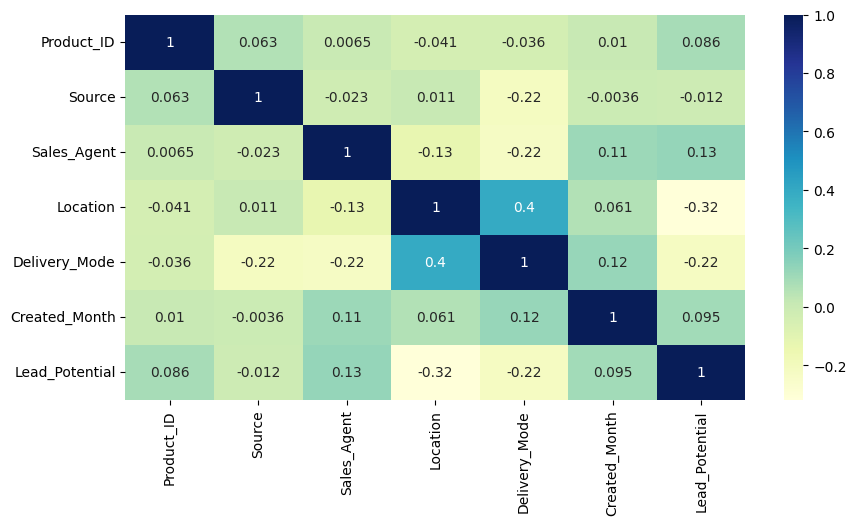

In [38]:
# we use Heatmap for Checking Co-Relation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

In [39]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_Month,Lead_Potential
Product_ID,1.000000,0.063262,0.006529,-0.041227,-0.036025,0.010415,0.086398
Source,0.063262,1.000000,-0.023186,0.011031,-0.216516,-0.003561,-0.012439
Sales_Agent,0.006529,-0.023186,1.000000,-0.129056,-0.224688,0.114074,0.130574
Location,-0.041227,0.011031,-0.129056,1.000000,0.397186,0.060828,-0.316756
Delivery_Mode,-0.036025,-0.216516,-0.224688,0.397186,1.000000,0.121348,-0.223647
Created_Month,0.010415,-0.003561,0.114074,0.060828,0.121348,1.000000,0.094869
Lead_Potential,0.086398,-0.012439,0.130574,-0.316756,-0.223647,0.094869,1.000000


#### Scalling The Data

In [40]:
# Scalling all columns excluding Lead_Potential(target column)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])
data.head()

C:\Users\satya\AppData\Local\Temp\ipykernel_21488\3583042498.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32142857 0.67857143 0.64285714 ... 0.17857143 0.75       0.89285714]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])
C:\Users\satya\AppData\Local\Temp\ipykernel_21488\3583042498.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8 0.  1.  ... 0.8 0.6 1. ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])
C:\Users\satya\AppData\Local\Temp\ipykernel_21488\3583042498.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4 0.5 0.1 ... 0.1 0.5 0.4]' has dtype incompatib

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Created_Month,Lead_Potential
0,0.321429,0.8,0.4,0.0625,0.0,1.0,1
1,0.678571,0.0,0.5,0.6250,1.0,1.0,1
2,0.642857,1.0,0.1,0.8125,0.0,1.0,1
3,0.535714,1.0,0.8,0.3750,0.0,1.0,0
4,0.642857,0.0,0.8,0.0625,0.0,1.0,1


## **Splitting Data**
To split the dataset into training and testing sets to allow model training and unbiased evaluation.

In [41]:
# Define features (X) and target (y)
X = data.drop('Lead_Potential', axis=1)
y = data['Lead_Potential']

In [42]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [43]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5862, 6)
Shape of y_train: (5862,)
Shape of X_test: (1466, 6)
Shape of y_test: (1466,)


In [44]:
# SMOTE for sampling technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [45]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7176, 6)
Shape of y_train: (7176,)
Shape of X_test: (1466, 6)
Shape of y_test: (1466,)


## **Model Building**

#### **Let's Import Logistic Regression**

In [46]:
# Import the correct class from the correct module
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# By Deafault it will take 100 Iteration
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Predict the target variable for the testing data using the trained Logistic Regression model.
y_test_pred_lr = lr.predict(X_test)
y_test_pred_lr

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
# Predict the target variable for the training data using the trained Logistic Regression model.
y_train_pred_lr=lr.predict(X_train)
y_train_pred_lr

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [49]:
# Calculate and display the accuracy score of the Logistic Regression model on the training data.
acc_score=accuracy_score(y_train,y_train_pred_lr)
acc_score

0.6617892976588629

In [50]:
## Calculate and display the F1 score of the Logistic Regression model on the training data.
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred_lr)

0.6624008902489915

In [51]:
#Classification Report on Training Data of Logistic Regression
print(classification_report(y_train,y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      3588
           1       0.66      0.66      0.66      3588

    accuracy                           0.66      7176
   macro avg       0.66      0.66      0.66      7176
weighted avg       0.66      0.66      0.66      7176



In [52]:
# Now Checking Testing Score
# Calculate and display the weighted F1 score for the Logistic Regression model on the testing data.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_lr, average='weighted') # Add average='weighted'
test_score

0.6652443447047094

In [53]:
# Calculate and display the accuracy score of the Logistic Regression model on the testing data.
acc_score=accuracy_score(y_test,y_test_pred_lr)
acc_score

0.6609822646657572

In [54]:
print(classification_report(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       897
           1       0.55      0.69      0.61       569

    accuracy                           0.66      1466
   macro avg       0.66      0.67      0.66      1466
weighted avg       0.68      0.66      0.67      1466



In [55]:
# Create and display a confusion matrix for the Logistic Regression model's predictions on the testing data.
pd.crosstab(y_test,y_test_pred_lr) #Confusion Matrix

col_0,0,1
Lead_Potential,,
0,575,322
1,175,394


#### **Let's Import Decision Tree**


In [56]:
# Import necessary libraries for Decision Tree classification and model evaluation.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
# Create and train a DecisionTreeClassifier model.
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [58]:
# Predict the target variable for the testing data using the trained Decision Tree model.
y_test_pred_dt=dt.predict(X_test)
y_test_pred_dt

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [59]:
# Predict the target variable for the training data using the trained Decision Tree model.
y_train_pred_dt=dt.predict(X_train)
y_train_pred_dt

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
# Calculate and display the accuracy score of the Decision Tree model on the training data.
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_dt)
acc_score

0.9145763656633222

In [61]:
print(classification_report(y_train,y_train_pred_dt)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3588
           1       0.95      0.88      0.91      3588

    accuracy                           0.91      7176
   macro avg       0.92      0.91      0.91      7176
weighted avg       0.92      0.91      0.91      7176



In [62]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_dt)
test_acc

0.6875852660300137

In [63]:
# Now Checking Testing Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_dt, average='weighted') # Add average='weighted'
test_score

0.6858031823763124

In [64]:
# Display the classification report for the Decision Tree model on the testing data.
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       897
           1       0.60      0.57      0.59       569

    accuracy                           0.69      1466
   macro avg       0.67      0.67      0.67      1466
weighted avg       0.68      0.69      0.69      1466



####  **Let's Import Hyperparameters of DecisionTree**

Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.

In [68]:
# create a new model with the optimal values
dt1=DecisionTreeClassifier(criterion='gini',max_depth=10, max_features='sqrt',min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [69]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [70]:
 # Checking Predict testing Score
y_test_pred_dt1=dt1.predict(X_test)
y_test_pred_dt1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [71]:
# checking Predict traing Score
y_train_pred_dt1=dt1.predict(X_train)
y_train_pred_dt1

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_dt1)
acc_score

0.7671404682274248

In [73]:
print(classification_report(y_train,y_train_pred_dt1)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      3588
           1       0.78      0.75      0.76      3588

    accuracy                           0.77      7176
   macro avg       0.77      0.77      0.77      7176
weighted avg       0.77      0.77      0.77      7176



In [74]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_dt1)
test_acc

0.6739427012278308

In [75]:
# Now Checking Testing Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_dt1, average='weighted') # Add average='weighted'
test_score

0.674546033720362

In [76]:
print(classification_report(y_test,y_test_pred_dt1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       897
           1       0.58      0.59      0.58       569

    accuracy                           0.67      1466
   macro avg       0.66      0.66      0.66      1466
weighted avg       0.68      0.67      0.67      1466



#### **Let's Use Random Forest Classifier**

In [77]:
# Create and train a RandomForestClassifier with 1000 decision trees.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000) #object creation ,taking 1000 decision tree in random forest
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [78]:
## Predict the target variable for the training data using the trained Random Forest model.
y_train_pred_rfc=rfc.predict(X_train)
y_train_pred_rfc

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
# # Predict the target variable for the testing data using the trained Random Forest model.
y_test_pred_rfc=rfc.predict(X_test)
y_test_pred_rfc

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [80]:
# # Calculate and display the accuracy score of the Random Forest model on the training data.
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_rfc)
acc_score

0.9145763656633222

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_rfc)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3588
           1       0.92      0.91      0.91      3588

    accuracy                           0.91      7176
   macro avg       0.91      0.91      0.91      7176
weighted avg       0.91      0.91      0.91      7176



In [82]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_rfc)
test_acc

0.7060027285129604

In [83]:
# Now Checking Testing Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_rfc, average='weighted') # Add average='weighted'
test_score

0.7068432013145967

In [84]:
# Display the classification report for the Random Forest model on the testing data.
print(classification_report(y_test,y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       897
           1       0.62      0.64      0.63       569

    accuracy                           0.71      1466
   macro avg       0.69      0.69      0.69      1466
weighted avg       0.71      0.71      0.71      1466



## **Let's Import Hyperparameter for Random Forest**

In [88]:
# create a new model with the optimal values
dt2=RandomForestClassifier(criterion='gini',max_depth=10,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split=5)#passing best parameter to decision tree

In [89]:
# # Train the RandomForestClassifier model (dt2) using the training data.
dt2.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [90]:
# Predict the target variable for the testing data using the trained Hyperparameter RandomForestClassifier (dt2).
y_test_pred_dt2=dt2.predict(X_test)
y_test_pred_dt2

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [91]:
# Predict the target variable for the training data of Hyperparameter RandomForestClassifier (dt2).
y_train_pred_dt2=dt2.predict(X_train)
y_train_pred_dt2

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
# Calculate and display the accuracy score of the Hyperparameter RandomForestClassifier (dt2) on the training data.
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_dt2)
acc_score

0.8251114827201784

In [93]:
# Calculate F1 Score
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred_dt2)

0.8272063885446785

In [94]:
print(classification_report(y_train,y_train_pred_dt2)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3588
           1       0.82      0.84      0.83      3588

    accuracy                           0.83      7176
   macro avg       0.83      0.83      0.83      7176
weighted avg       0.83      0.83      0.83      7176



In [95]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_dt2)
test_acc

0.7148703956343793

In [96]:
# Calculate and display the accuracy score of the Hyperparameter RandomForestClassifier (dt2) on the testing data.
acc_score=accuracy_score(y_test,y_test_pred_dt2)
acc_score

0.7148703956343793

In [97]:
#calcuate F1 Score
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred_dt2)

0.6533996683250415

In [98]:
# Display the classification report for the Random Forest model on the testing data.
print(classification_report(y_test,y_test_pred_dt2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       897
           1       0.62      0.69      0.65       569

    accuracy                           0.71      1466
   macro avg       0.70      0.71      0.71      1466
weighted avg       0.72      0.71      0.72      1466



## **Let's Import KNN**

In [99]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN=KNeighborsClassifier() ## model object creation
KNN.fit(X_train,y_train)  ## fitting the model

KNeighborsClassifier()

In [100]:
# Predict the target variable for the testing data using the trained KNN model.
y_test_pred_knn=KNN.predict(X_test)
y_test_pred_knn

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [101]:
# Predict the target variable for the training data using the trained KNN model.
y_train_pred_knn=KNN.predict(X_train)
y_train_pred_knn

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
# Calculate and display the accuracy score of the KNN model on the training data.
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_knn)
acc_score

0.8061594202898551

In [103]:
print(classification_report(y_train,y_train_pred_knn)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3588
           1       0.80      0.82      0.81      3588

    accuracy                           0.81      7176
   macro avg       0.81      0.81      0.81      7176
weighted avg       0.81      0.81      0.81      7176



In [104]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_knn)
test_acc

0.6739427012278308

In [105]:
# Now Checking Testing Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_knn, average='weighted') # Add average='weighted'
test_score

0.677956958984746

In [106]:
# Display the classification report for the KNN model on the testing data.
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       897
           1       0.56      0.70      0.62       569

    accuracy                           0.67      1466
   macro avg       0.67      0.68      0.67      1466
weighted avg       0.69      0.67      0.68      1466



## **Let's Import Artificial Neural Network [MLP Classifier]**

In [107]:
# Train a Multi-layer Perceptron (MLP) Classifier model.
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)
mlpc.fit(X_train,y_train)

C:\Users\satya\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [108]:
# Predict attrition on the testing data using the MLP Classifier model.
y_test_pred_mlpc=mlpc.predict(X_test)#predicting test data
y_test_pred_mlpc

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [109]:
# Predict attrition on the training data using the MLP Classifier model.
y_train_pred_mlpc=mlpc.predict(X_train)#predicting train data
y_train_pred_mlpc

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [110]:
# Evaluate the MLP Classifier model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_mlpc)#checking accuracy
acc_test

0.7086120401337793

In [111]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_mlpc, average='weighted')

0.7069587792702803

In [112]:
# Display the classification report for the MLP Classifier model (training data).
print(classification_report(y_train,y_train_pred_mlpc))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3588
           1       0.68      0.78      0.73      3588

    accuracy                           0.71      7176
   macro avg       0.71      0.71      0.71      7176
weighted avg       0.71      0.71      0.71      7176



In [113]:
# Evaluate the MLP Classifier model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_mlpc)#checking accuracy
acc_test

0.6841746248294679

In [114]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_mlpc, average='weighted')

0.6874411513549001

In [115]:
# Display the classification report for the MLP Classifier model (testing data).
print(classification_report(y_test,y_test_pred_mlpc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.83      0.61      0.70       897
           1       0.57      0.80      0.66       569

    accuracy                           0.68      1466
   macro avg       0.70      0.70      0.68      1466
weighted avg       0.73      0.68      0.69      1466



## **Let's Import Support Vector Machine**

In [116]:
# Train a Support Vector Classifier (SVC) model.
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [117]:
# Predict attrition on the testing data using the SVC model.
y_test_pred_svc=svc.predict(X_test)#predicting test data
y_test_pred_svc

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [118]:
# Predict attrition on the training data using the SVC model.
y_train_pred_svc=svc.predict(X_train)#predicting train data
y_train_pred_svc

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [119]:
# Evaluate the SVC model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_svc)#checking accuracy
acc_test

0.693422519509476

In [120]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_svc, average='weighted')

0.6926053070991212

In [121]:
# Display the classification report for the SVC model (training data).
print(classification_report(y_train,y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3588
           1       0.68      0.74      0.71      3588

    accuracy                           0.69      7176
   macro avg       0.70      0.69      0.69      7176
weighted avg       0.70      0.69      0.69      7176



In [122]:
# Evaluate the SVC model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_svc)#checking accuracy
acc_test

0.6664392905866303

In [123]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_svc, average='weighted')

0.6700540203263343

In [124]:
# Display the classification report for the SVC model (testing data).
print(classification_report(y_test,y_test_pred_svc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       897
           1       0.55      0.77      0.64       569

    accuracy                           0.67      1466
   macro avg       0.68      0.69      0.66      1466
weighted avg       0.71      0.67      0.67      1466



## **Let's Import Gradient Boosting**

In [125]:
# Create and train a GradientBoostingClassifier model.
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [126]:
# Predict the target variable for the testing data using the trained GradientBoostingClassifier model.
y_test_pred_gbc=gbc.predict(X_test)
y_test_pred_gbc

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [127]:
# Predict the target variable for the training data using the trained GradientBoostingClassifier model.
y_train_pred_gbc=gbc.predict(X_train)
y_train_pred_gbc


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [128]:
# Calculate and display the accuracy score of the GradientBoostingClassifier model on the training data.
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_gbc)
acc_score

0.7608695652173914

In [129]:
print(classification_report(y_train,y_train_pred_gbc)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3588
           1       0.76      0.77      0.76      3588

    accuracy                           0.76      7176
   macro avg       0.76      0.76      0.76      7176
weighted avg       0.76      0.76      0.76      7176



In [130]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_gbc)
test_acc

0.7271487039563438

In [131]:
# Now Checking Testing Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_gbc, average='weighted') # Add average='weighted'
test_score

0.729206663714699

In [132]:
# Display the classification report for the GradientBoostingClassifier model on the testing data.
print(classification_report(y_test,y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       897
           1       0.63      0.70      0.67       569

    accuracy                           0.73      1466
   macro avg       0.72      0.72      0.72      1466
weighted avg       0.73      0.73      0.73      1466



## **Let's Apply XGBoosting**

In [133]:
from xgboost import XGBClassifier

xgb= XGBClassifier() ## object creation
xgb.fit(X_train, y_train)# fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
# Predict the target variable for the testing data using the trained XGBoostingClassifier model.
y_test_pred_xgb=xgb.predict(X_test)
y_test_pred_xgb

array([0, 1, 0, ..., 0, 1, 1])

In [135]:
# Predict the target variable for the training data using the trained XGBoostingClassifier model.
y_train_pred_xgb=xgb.predict(X_train)
y_train_pred_xgb

array([1, 1, 0, ..., 1, 1, 1])

In [136]:
# Calculate and display the accuracy score
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_train,y_train_pred_xgb)
acc_score

0.8464325529542921

In [137]:
print(classification_report(y_train,y_train_pred_xgb)) # Checking Training Score

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3588
           1       0.85      0.84      0.85      3588

    accuracy                           0.85      7176
   macro avg       0.85      0.85      0.85      7176
weighted avg       0.85      0.85      0.85      7176



In [138]:
# Now Checking TEsting Accuracy
test_acc=accuracy_score(y_test,y_test_pred_xgb)
test_acc

0.708731241473397

In [139]:
# Now Checking Testing Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # Import f1_score here
test_score=f1_score(y_test,y_test_pred_xgb, average='weighted') # Add average='weighted'
test_score

0.710320530083124

In [140]:
# Display the classification report for the XGBoostingClassifier model on the testing data.
print(classification_report(y_test,y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       897
           1       0.62      0.66      0.64       569

    accuracy                           0.71      1466
   macro avg       0.70      0.70      0.70      1466
weighted avg       0.71      0.71      0.71      1466



In [141]:
import pandas as pd
from IPython.display import display

# Create a dictionary with the model names and their scores
datadf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier','KNN','Artificial Neural Network [MLP]',
                    'SVC','Gradient Boosting','XGBoosting'],
        'Training Accuracy': [0.66, 0.91, 0.77, 0.91, 0.83, 0.81, 0.71, 0.69,0.76,0.85],
        'Testing Accuracy': [0.66, 0.69, 0.67, 0.71, 0.71, 0.67, 0.68, 0.67,0.73,0.71]}

# Create a DataFrame from the dictionary
df_scores = pd.DataFrame(datadf)

# Display the DataFrame
display(df_scores)

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.66,0.66
1,Decision Tree,0.91,0.69
2,Hyperparameter Tuned Decision Tree,0.77,0.67
3,Random Forest Classifier,0.91,0.71
4,Hyperparameter Tuned Random Forest Classifier,0.83,0.71
5,KNN,0.81,0.67
6,Artificial Neural Network [MLP],0.71,0.68
7,SVC,0.69,0.67
8,Gradient Boosting,0.76,0.73
9,XGBoosting,0.85,0.71


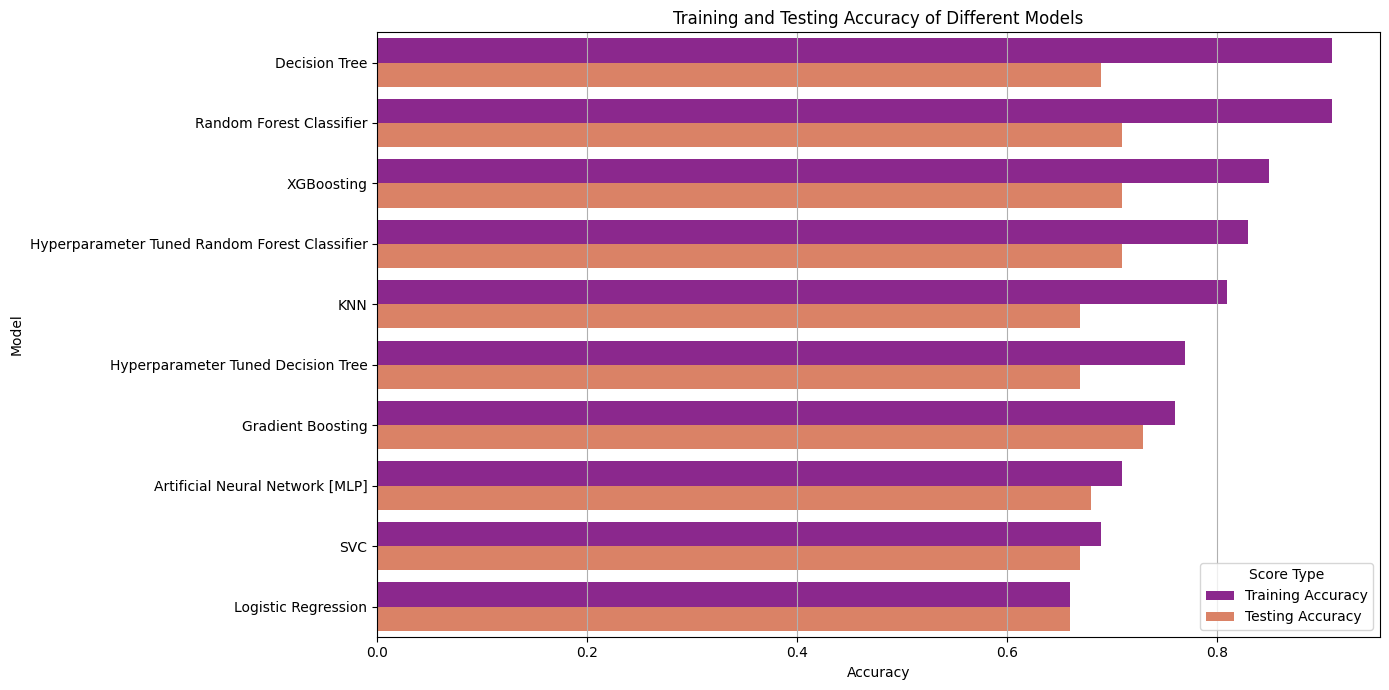

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary with the model names and their scores
dataf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier','KNN','Artificial Neural Network [MLP]',
                    'SVC','Gradient Boosting','XGBoosting'],
         'Training Accuracy': [0.66, 0.91, 0.77, 0.91, 0.83, 0.81, 0.71, 0.69,0.76,0.85],
        'Testing Accuracy': [0.66, 0.69, 0.67, 0.71, 0.71, 0.67, 0.68, 0.67,0.73,0.71]}

# Create a DataFrame
df_scores = pd.DataFrame(dataf)

# Reshape the DataFrame to a long format for easier plotting with seaborn
df_scores_melted = df_scores.melt(id_vars='Model', var_name='Score Type', value_name='Accuracy')

# Sort the DataFrame by Accuracy and Score Type for better visualization
# Sort by 'Accuracy' to order by score value, and by 'Score Type' to ensure
df_scores_melted = df_scores_melted.sort_values(by=['Accuracy', 'Score Type'], ascending=[False, True])

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Accuracy', y='Model', hue='Score Type', data=df_scores_melted, palette='plasma')
plt.title('Training and Testing Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.legend(title='Score Type')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\satya\AppData\Local\Temp\ipykernel_21488\1436653654.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Testing Accuracy', y='Model', data=df_scores, palette='viridis')


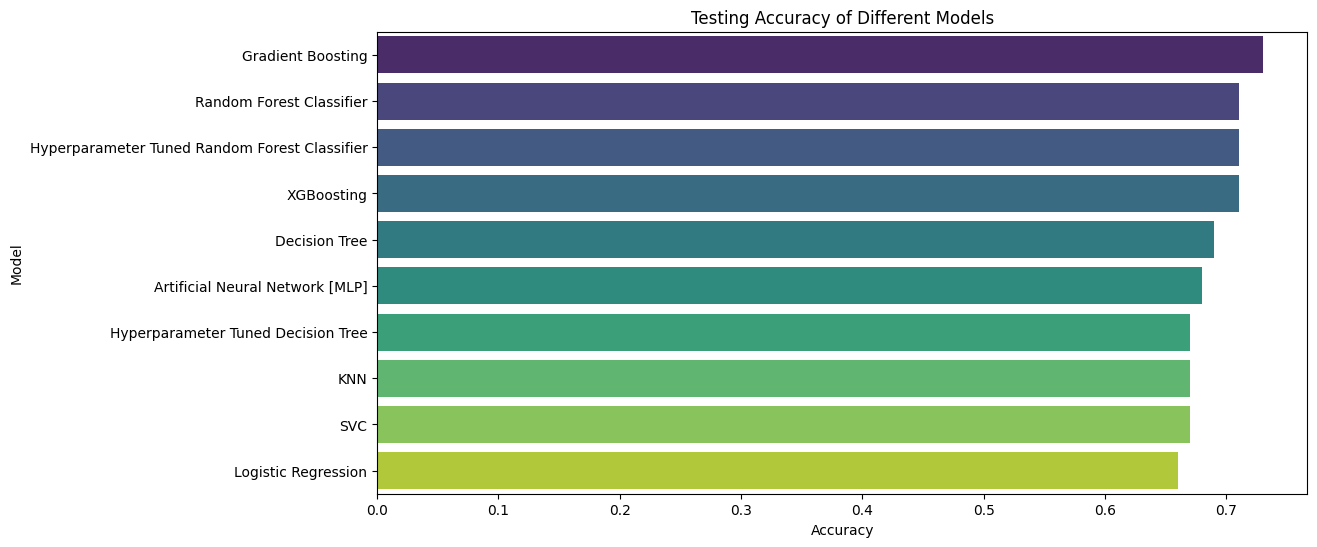

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary with the model names and their testing scores
dataf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier','KNN','Artificial Neural Network [MLP]',
                    'SVC','Gradient Boosting','XGBoosting'],
        'Testing Accuracy': [0.66, 0.69, 0.67, 0.71, 0.71, 0.67, 0.68, 0.67,0.73,0.71]}

# Create a DataFrame
df_scores = pd.DataFrame(dataf)

# Sort the DataFrame by Testing Accuracy
df_scores = df_scores.sort_values('Testing Accuracy', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Testing Accuracy', y='Model', data=df_scores, palette='viridis')
plt.title('Testing Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
# plt.xlim(0.8, 1.0) # Remove or adjust this line
plt.show()

#### **Model Comparison :** 

We experimented with multiple classification models to predict lead potential. Here's the overview:

1. **Logistic Regression:** Moderate performance with equal training and testing accuracy (66%).

2. **Decision Tree:** High overfitting observed (Training: 91%, Testing: 69%).

3. **Tuned Decision Tree:** Reduced overfitting but still moderate generalization (Training: 77%, Testing: 67%).

4. **Random Forest:** High training accuracy but slight overfitting (91% vs 71%).

5. **Tuned Random Forest:** Improved generalization compared to untuned version (83% vs 71%).

6. **KNN:** Moderate scores with slight overfitting (81% vs 67%).

7. **ANN (MLP):** Performed fairly with a good balance (71% vs 68%).

8. **SVC:** Consistent but lower performance (69% vs 67%).

9. **Gradient Boosting:** Chosen Model — slightly lower training accuracy (76%) but best generalization with highest testing accuracy (73%) and smallest gap.

10. **XGBoosting** Good performance (85% vs 71%) but higher overfitting than Gradient Boosting.

#### **Final Model:** Gradient Boosting


We selected Gradient Boosting as the final model due to:
* Best generalization ability.

* Highest testing accuracy (73%).

* Smallest train-test accuracy gap (just 3%)

#### **Conclusion:**

Through extensive data exploration, visualization, and machine learning modeling, we identified key patterns and built a predictive system to classify leads as High Potential or Low Potential. Among multiple models tested, Gradient Boosting emerged as the most effective, balancing accuracy and generalization (Training: 76%, Testing: 73%).

This model enables sales teams to focus on high-quality leads, improving conversion rates and optimizing effort allocation.

#### **Recommendations to Improve Sales Effectiveness**

1. **Focus on Good Leads First :**
Use the model to find leads that are most likely to convert and assign your best salespeople to handle them.

2. **Put More Effort Where It Works:**
Spend more time and budget on sources like Live Chat, Calls, and Website. Try to fix or rethink sources like Campaigns or Referrals that bring fewer quality leads.

3. **Learn from the Best Sales Agents:**
Look at what your top sales agents (like Agent 4 and Agent 11) are doing right, and help others follow the same methods.

4. **Target the Right Locations:**
Put more focus on areas like Bangalore, Other Locations, and Trivandrum where you're already getting better results.

5. **Use the Right Time for Promotions:**
Plan campaigns during months like May to July, when you usually get more leads.

6. **Choose Better Delivery Options:**
Use delivery modes like Mode_1 and Mode_5 more often, they seem to work better with customers.

7. **Work on Promising Leads:**
Pay extra attention to leads marked as ‘Potential’, ‘Just Enquiry’, or ‘In Progress Positive’, they can still be converted.

8. **Keep Updating the Model:**
Keep training the model with fresh data so it stays accurate as things change over time.

9. **Track Everything Easily:**
Set up a dashboard so you can see live updates on lead quality, agent performance, and sales progress in one place.